**NLP project of Bag of N-grams**

*   This project is about fake news detection
*   Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* I will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

* Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.












**DATASET LINK**

Credits --> https://www.kaggle.com/datasets/jillanisofttech/fake-or-real-news

# Loading dataset

In [91]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [92]:
!kaggle datasets download -d jillanisofttech/fake-or-real-news

In [93]:
!unzip fake-or-real-news.zip

# Checking dataset


In [94]:
import pandas as pd
data = pd.read_csv("fake_or_real_news.csv")

In [95]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [96]:
data.shape

(6335, 4)

In [97]:
type(data.label)

pandas.core.series.Series

In [98]:
data.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

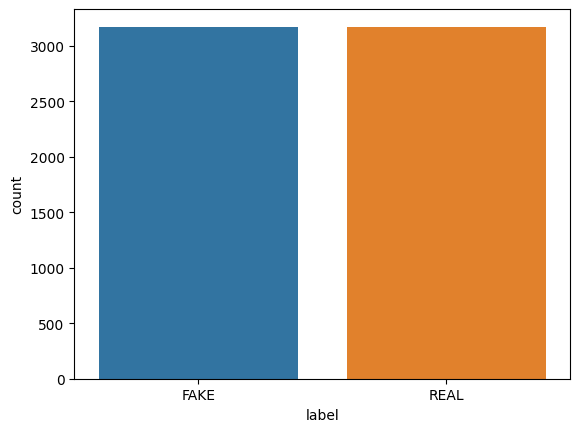

In [99]:
import seaborn as sns
sns.countplot(x='label',data=data)

In [100]:
data['label_num'] = data['label'].map({'FAKE' : 0, 'REAL': 1})

In [101]:
data

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


# Modelling without Pre-processing Text data

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
  data.text,
  data.label_num,
  test_size = 0.2,
  random_state=2022,
  stratify=data.label_num
)

In [107]:
X_train.shape

(5068,)

In [110]:
X_test.shape

(1267,)

## K nearest Neighbors Classifier

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),
    ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       633
           1       0.75      0.58      0.66       634

    accuracy                           0.69      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.70      0.69      0.69      1267



## Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       633
           1       0.88      0.87      0.88       634

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



## Multinomial Naive Bayes Classifier

In [122]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB(alpha = 0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       633
           1       0.85      0.97      0.91       634

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.91      0.90      0.90      1267



# By Using text pre-processing

In [127]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)
  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    else:
      filtered_tokens.append(token.lemma_)

  return ' '.join(filtered_tokens)

In [128]:
data['cleaned_text'] = data['text'].apply(preprocess)

In [129]:
data.head()

,Unnamed: 0,title,text,label,label_num,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,U.S. Secretary State John F. Kerry say Monday ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Kaydee King @KaydeeKing November 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,primary day New York runner Hillary Clinton Do...


In [139]:
X_train,X_test,y_train,y_test = train_test_split(
  data.cleaned_text,
  data.label_num,
  test_size = 0.2,
  random_state=2022,
  stratify=data.label_num
)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

## Multinomial Naive Bayes Classifier

In [140]:
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB(alpha = 0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       633
           1       0.85      0.98      0.91       634

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.90      1267
weighted avg       0.91      0.91      0.90      1267



**Printing accuracy matrix of our best matrix**

Text(95.72222222222221, 0.5, 'Truth')

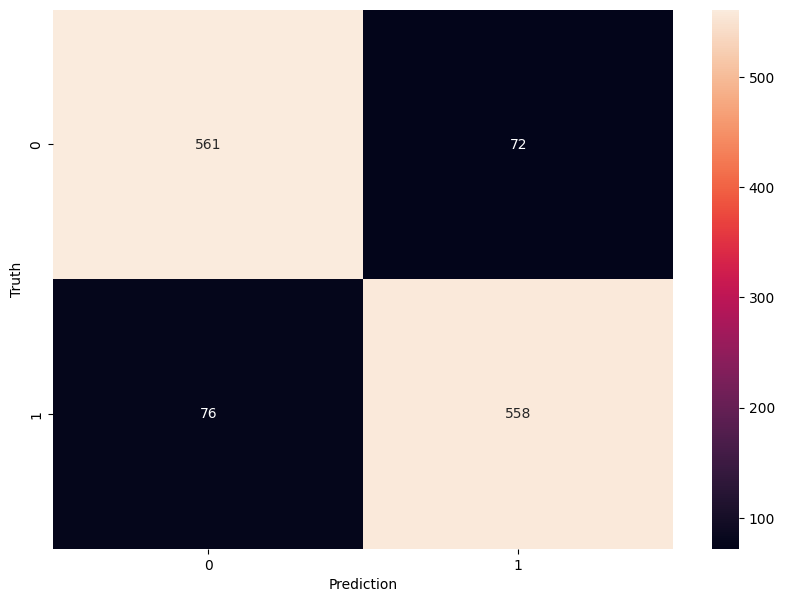

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')